✅ Dataset created successfully!

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          500 non-null    int64  
 1   GPA                 500 non-null    float64
 2   Family_Income       500 non-null    int64  
 3   Category            500 non-null    object 
 4   Scholarship_Amount  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB
None

Missing Values:
 Student_ID            0
GPA                   0
Family_Income         0
Category              0
Scholarship_Amount    0
dtype: int64

Descriptive Stats:
        Student_ID         GPA  Family_Income  Scholarship_Amount
count  500.000000  500.000000     500.000000          500.000000
mean   250.500000    7.993940  389352.788000        54422.578000
std    144.481833    1.194626  227096.771399        25922.104368
min  

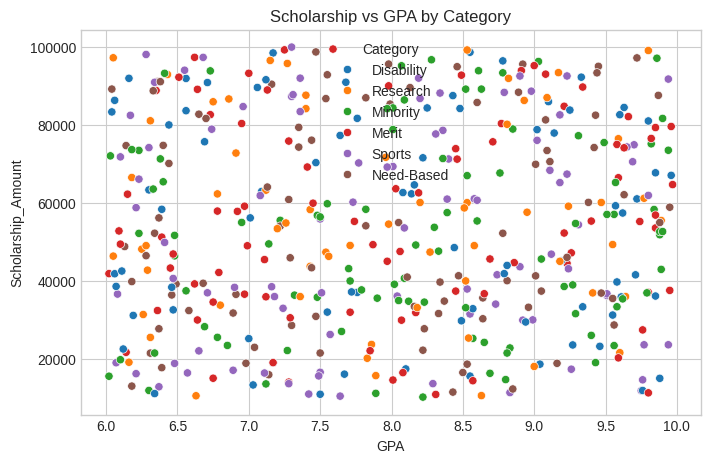

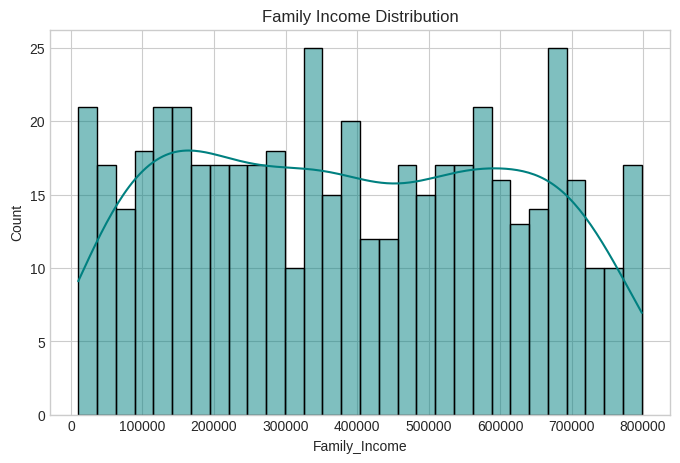


✅ Processed Data Sample:
     GPA  Family_Income  Category_Code  Scholarship_Amount
0  7.50         712965              0               11007
1  9.80         393934              0               80981
2  8.93         327428              4               86242
3  8.39         329187              2               57517
4  6.62         700907              1               39257

🎯 Model Performance:
MAE: 23322.599100000003
MSE: 793819224.7635449
R² Score: -0.2103148707447997


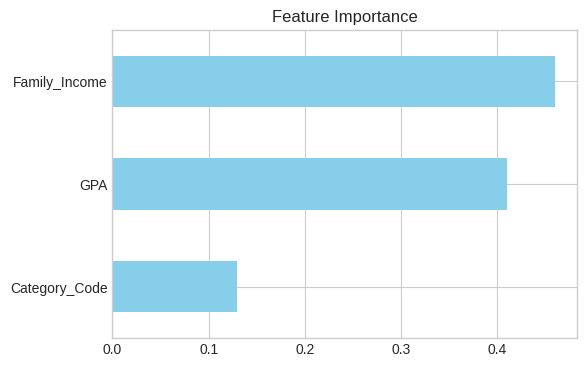


💰 Predicted Scholarship Amount for Category 'Minority': ₹46390.40

✅ Model saved as 'scholarship_recommendation_model.pkl'!


/tmp/ipython-input-1544011388.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Scholarship_Amount", palette="viridis")


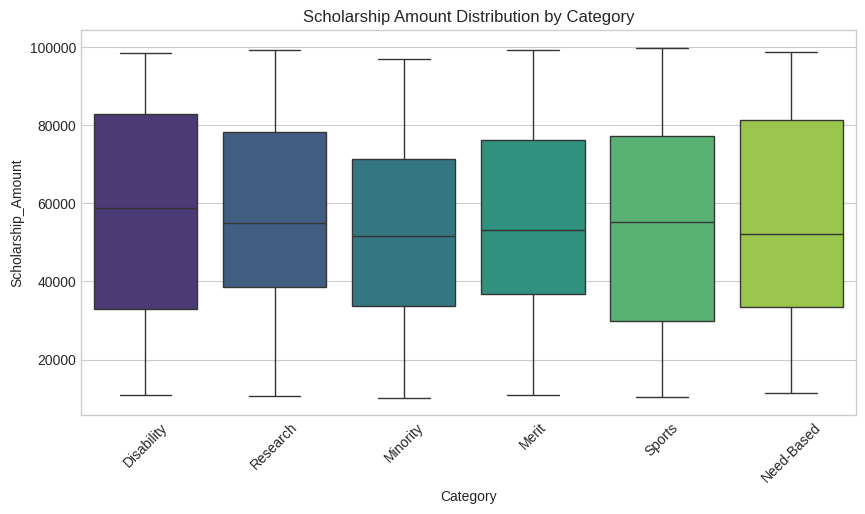

In [5]:
# ==========================
# 📘 SCHOLARSHIP RECOMMENDATION SYSTEM (Colab Friendly)
# ==========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# ==========================
# Step 2: Create / Load Dataset
# ==========================

# Simulated scholarship dataset
np.random.seed(42)
n = 500

categories = ["Merit", "Need-Based", "Sports", "Research", "Minority", "Disability"]

data = {
    "Student_ID": range(1, n + 1),
    "GPA": np.random.uniform(6.0, 10.0, n).round(2),
    "Family_Income": np.random.randint(10000, 800000, n),
    "Category": np.random.choice(categories, n),
    "Scholarship_Amount": np.random.randint(10000, 100000, n)
}

df = pd.DataFrame(data)
df.to_csv("scholarship_data.csv", index=False)
print("✅ Dataset created successfully!\n")

# ==========================
# Step 3: Basic EDA
# ==========================
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Stats:\n", df.describe())

plt.style.use("seaborn-v0_8-whitegrid")

# GPA vs Scholarship
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="GPA", y="Scholarship_Amount", hue="Category")
plt.title("Scholarship vs GPA by Category")
plt.show()

# Family Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Family_Income"], bins=30, kde=True, color='teal')
plt.title("Family Income Distribution")
plt.show()

# ==========================
# Step 4: Data Preprocessing
# ==========================
df["GPA"] = df["GPA"].astype(float)
df["Family_Income"] = df["Family_Income"].astype(int)

# Encode categorical features
le = LabelEncoder()
df["Category_Code"] = le.fit_transform(df["Category"])

df_processed = df[["GPA", "Family_Income", "Category_Code", "Scholarship_Amount"]]
print("\n✅ Processed Data Sample:\n", df_processed.head())

# ==========================
# Step 5: Model Training
# ==========================
X = df_processed[["GPA", "Family_Income", "Category_Code"]]
y = df_processed["Scholarship_Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ==========================
# Step 6: Model Evaluation
# ==========================
y_pred = model.predict(X_test)

print("\n🎯 Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Feature importance visualization
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.show()

# ==========================
# Step 7: Prediction Example (Dynamic Category)
# ==========================
sample_category = np.random.choice(df["Category"].unique())
sample_code = le.transform([sample_category])[0]

sample = pd.DataFrame({
    "GPA": [8.7],
    "Family_Income": [250000],
    "Category_Code": [sample_code]
})

predicted_amount = model.predict(sample)[0]
print(f"\n💰 Predicted Scholarship Amount for Category '{sample_category}': ₹{predicted_amount:.2f}")

# ==========================
# Step 8: Save Model
# ==========================
joblib.dump(model, "scholarship_recommendation_model.pkl")
print("\n✅ Model saved as 'scholarship_recommendation_model.pkl'!")

# ==========================
# Step 9: Summary Visualization
# ==========================
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Category", y="Scholarship_Amount", palette="viridis")
plt.title("Scholarship Amount Distribution by Category")
plt.xticks(rotation=45)
plt.show()
